In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv("Startups.csv")
dataset.shape

(50, 5)

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.isna().sum()
dataset.duplicated().any()

False

c:\Users\Diavolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Diavolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Diavolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Diavolo\anaconda

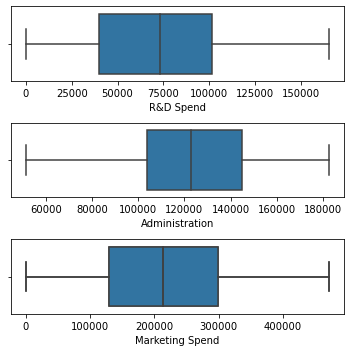

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))

plt1 = sns.boxplot(dataset['R&D Spend'], ax = axs[0])
plt2 = sns.boxplot(dataset['Administration'], ax = axs[1])
plt3 = sns.boxplot(dataset['Marketing Spend'], ax = axs[2])
plt3 = sns.boxplot(dataset['Marketing Spend'], ax = axs[2])

plt.tight_layout()

c:\Users\Diavolo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


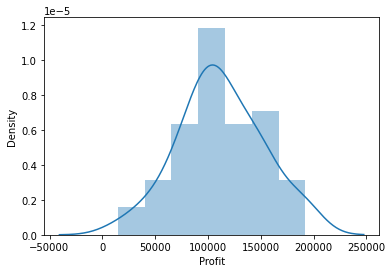

In [8]:
sns.distplot(dataset['Profit']);

In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


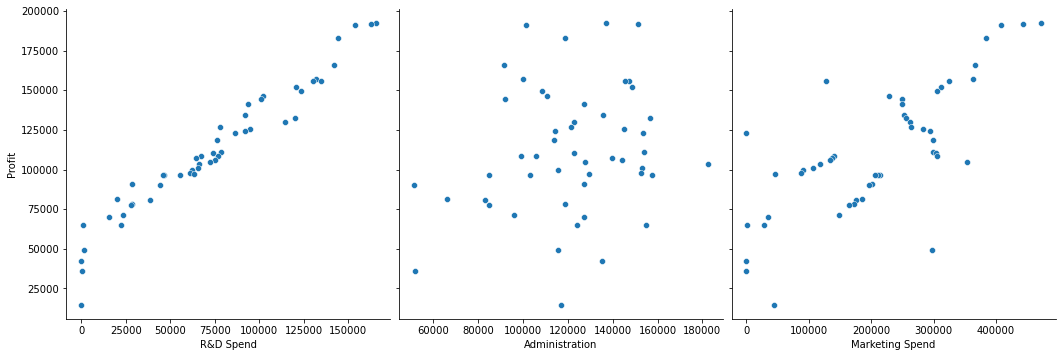

In [11]:
sns.pairplot(dataset, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars='Profit', height=5, aspect=1, kind='scatter')
plt.show()

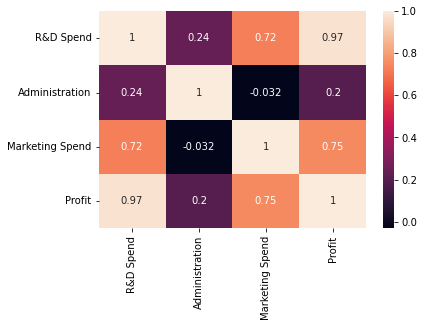

In [12]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
#Setting the value for X and Y
x = dataset[['R&D Spend']]
y = dataset['Profit']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [16]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [17]:
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  46823.27683169805
Coefficient: [0.87393216]


In [18]:
Regression_Equationslr= slr.intercept_+ slr.coef_

print("Regression Equation: ", Regression_Equationslr)

Regression Equation:  [46824.15076386]


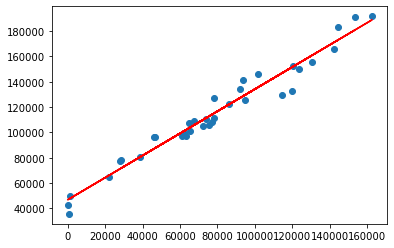

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, slr.intercept_+ slr.coef_*x_train, 'r')
plt.show()

In [21]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [22]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [164468.05689451  71873.45859368  85337.42353616 104547.82454126
  60374.23298163  46823.2768317  162074.74123159  95321.22456049
 113463.97759995  67483.84590995 191327.26075421 134803.74053692
 127005.81863743  47697.40999859  64502.56616675]


multi linear regresion

In [23]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
6,156122.51,164468.056895
36,90708.19,71873.458594
37,89949.14,85337.423536
28,103282.38,104547.824541
43,69758.98,60374.232982
49,14681.40,46823.276832
5,156991.12,162074.741232
33,96778.92,95321.224560
20,118474.03,113463.977600
42,71498.49,67483.845910


In [24]:
slr.predict([[56]])
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 94.57


In [25]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 9148.959166543504
Mean Square Error: 154134106.09876922
Root Mean Square Error: 12415.075758881587


In [26]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
x= dataset[['R&D Spend', 'Administration', 'Marketing Spend']]
y = dataset['Profit']

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [30]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [31]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [32]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [159377.5498869   73695.32742717  87556.51536214 101782.78003854
  58779.60094152  46331.19124125 163550.77100214  96629.47898904
 115692.34508507  68735.2476778  193333.23804869 135086.2106871
 128434.19661398  45998.9293523   67288.99791039]


In [33]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
6,156122.51,159377.549887
36,90708.19,73695.327427
37,89949.14,87556.515362
28,103282.38,101782.780039
43,69758.98,58779.600942
49,14681.40,46331.191241
5,156991.12,163550.771002
33,96778.92,96629.478989
20,118474.03,115692.345085
42,71498.49,68735.247678


In [34]:
mlr.predict([[56, 55, 67]])

array([47132.29407465])

In [35]:
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 94.99


In [36]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8421.49488812728
Mean Square Error: 142927396.96972522
Root Mean Square Error: 11955.224672490485
